# Tugas Kecil II Intelegensi Buatan 

Adylan Roaffa Ilmy - 13516016

Haifa Fadhila Ilma - 13516076 

## Import Dependencies

In [208]:
import pandas as pd
import numpy as np
import graphviz
import pickle
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import itertools
import random

from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn import neighbors, datasets

## a. Membaca Dataset

### Iris Dataset

In [209]:
iris_data = load_iris()
iris_X = iris_data.data
iris_y = iris_data.target
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### Play Tennis Dataset

In [210]:
tennis_data = pd.read_csv('weather.nominal.csv')
tennis_X = tennis_data.drop(["play"], axis=1)
tennis_y = tennis_data["play"]

In [211]:
tennis_X.head()

,outlook,temperature,humidity,windy
0,sunny,hot,high,False
1,sunny,hot,high,True
2,overcast,hot,high,False
3,rainy,mild,high,False
4,rainy,cool,normal,False


In [212]:
tennis_y.head()

0     no
1     no
2    yes
3    yes
4    yes
Name: play, dtype: object

## b. Full-training

### Naive Bayes 

In [213]:
gnb_model = GaussianNB()
gnb_model.fit(iris_X, iris_y)
iris_predict = gnb_model.predict(iris_X)
print("Class Prior: " ,gnb_model.class_prior_)
print("Parameters: " ,gnb_model.get_params())
print("Epsilon: " ,gnb_model.epsilon_)

Class Prior:  [0.33333333 0.33333333 0.33333333]
Parameters:  {'priors': None, 'var_smoothing': 1e-09}
Epsilon:  3.0955026666666677e-09


#### Naive Bayes Metrics

In [214]:
accuracy = accuracy_score(y_pred=iris_predict, y_true=iris_y)
precision = precision_score(y_pred=iris_predict, y_true=iris_y, average='micro')
recall = recall_score(y_pred=iris_predict, y_true=iris_y, average='micro')

print("Naive Bayes accuracy : ", accuracy)
print("Naive Bayes precision : ", precision)
print("Naive Bayes recall : ", recall)

Naive Bayes accuracy :  0.96
Naive Bayes precision :  0.96
Naive Bayes recall :  0.96


### Decision Tree

In [215]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(iris_X,iris_y)
iris_predict = dtc_model.predict(iris_X)

#### Decision Tree Metrics

In [216]:
accuracy = accuracy_score(y_pred=iris_predict, y_true=iris_y)
precision = precision_score(y_pred=iris_predict, y_true=iris_y, average='micro')
recall = recall_score(y_pred=iris_predict, y_true=iris_y, average='micro')

print("Decision Tree accuracy : ", accuracy)
print("Decision Tree precision : ", precision)
print("Decision Tree recall : ", recall)

Decision Tree accuracy :  1.0
Decision Tree precision :  1.0
Decision Tree recall :  1.0


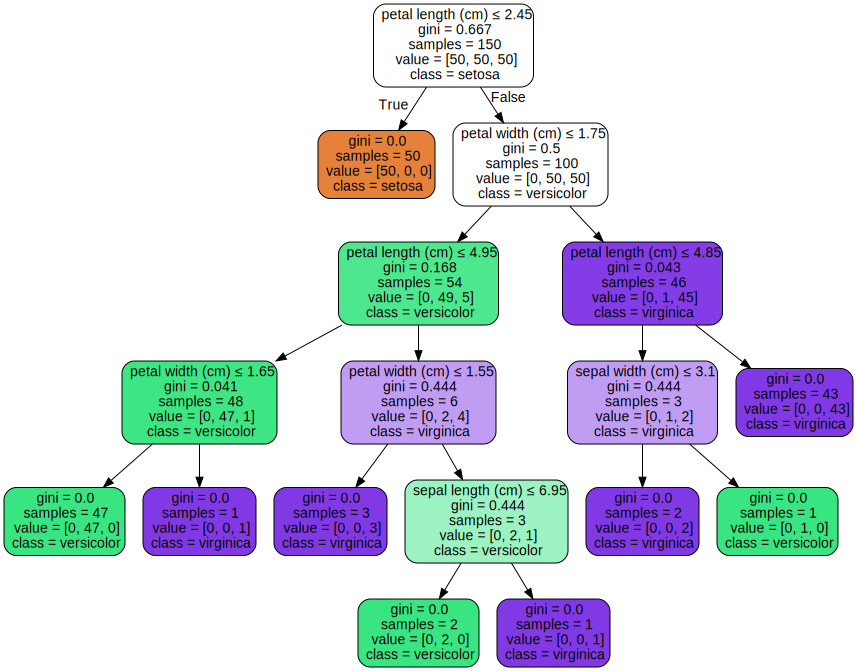

In [217]:
dot_data = export_graphviz(dtc_model, out_file=None, 
                         feature_names=iris_data.feature_names,  
                         class_names=iris_data.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

### kNN

In [218]:
knn_model = KNeighborsClassifier()
knn_model.fit(iris_X, iris_y)
iris_predict = knn_model.predict(iris_X)
print(knn_model)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


#### kNN Metrics

In [219]:
accuracy = accuracy_score(y_pred=iris_predict, y_true=iris_y)
precision = precision_score(y_pred=iris_predict, y_true=iris_y, average='micro')
recall = recall_score(y_pred=iris_predict, y_true=iris_y, average='micro')

print("kNN accuracy : ", accuracy)
print("kNN precision : ", precision)
print("kNN recall : ", recall)

kNN accuracy :  0.9666666666666667
kNN precision :  0.9666666666666667
kNN recall :  0.9666666666666667


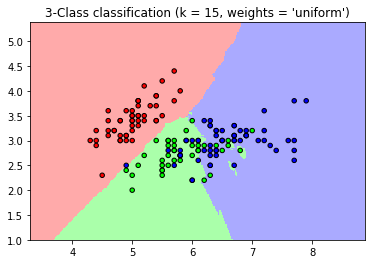

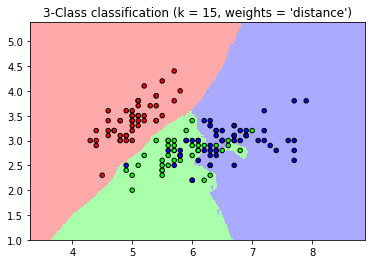

In [220]:
# Into visualization

n_neighbors = 15

iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)

    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

### MLP

In [221]:
mlp_model = MLPClassifier(max_iter=1000)
mlp_model.fit(iris_X, iris_y)
iris_predict = mlp_model.predict(iris_X)
print(mlp_model)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)


#### MLP Metrics

In [222]:
accuracy = accuracy_score(y_pred=iris_predict, y_true=iris_y)
precision = precision_score(y_pred=iris_predict, y_true=iris_y, average='micro')
recall = recall_score(y_pred=iris_predict, y_true=iris_y, average='micro')

print("MLP accuracy : ", accuracy)
print("MLP precision : ", precision)
print("MLP recall : ", recall)

MLP accuracy :  0.98
MLP precision :  0.98
MLP recall :  0.98


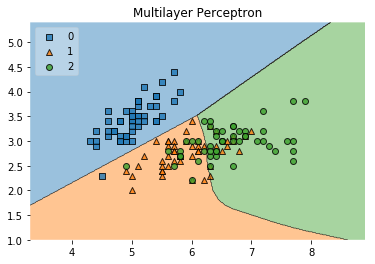

In [223]:
# Into Visualization
mlp_model.fit(X, y)
from mlxtend.plotting import plot_decision_regions
fig = plot_decision_regions(X=X, y=y, clf=mlp_model, legend=2)
plt.title('Multilayer Perceptron')
plt.show()

## C. Training with *train-test split* 

In [224]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

### Train-test split

In [225]:
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(iris_X, iris_y, test_size=0.1)

### Naive Bayes

In [226]:
gnb_model = GaussianNB()
gnb_model.fit(iris_X_train, iris_y_train)
iris_predict = gnb_model.predict(iris_X_test)
print(gnb_model)

GaussianNB(priors=None, var_smoothing=1e-09)


#### Naive Bayes Metrics

In [227]:
accuracy = accuracy_score(y_pred=iris_predict, y_true=iris_y_test)
precision = precision_score(y_pred=iris_predict, y_true=iris_y_test, average='micro')
recall = recall_score(y_pred=iris_predict, y_true=iris_y_test, average='micro')

print("Naive Bayes accuracy : ", accuracy)
print("Naive Bayes precision : ", precision)
print("Naive Bayes recall : ", recall)

Naive Bayes accuracy :  0.9333333333333333
Naive Bayes precision :  0.9333333333333333
Naive Bayes recall :  0.9333333333333333


##### Naive Bayes Confusion Matrix

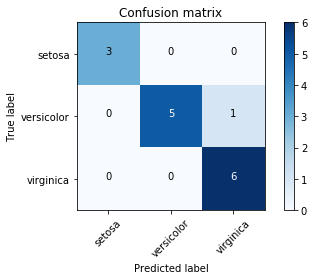

In [228]:
gnb_confusion = confusion_matrix(y_pred=iris_predict, y_true=iris_y_test)
plot_confusion_matrix(gnb_confusion, iris_data.target_names)

### Decision Tree

In [229]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(iris_X_train,iris_y_train)
iris_predict = dtc_model.predict(iris_X_test)

#### Decision Tree Metrics

In [230]:
accuracy = accuracy_score(y_pred=iris_predict, y_true=iris_y_test)
precision = precision_score(y_pred=iris_predict, y_true=iris_y_test, average='micro')
recall = recall_score(y_pred=iris_predict, y_true=iris_y_test, average='micro')

print("Decision Tree accuracy : ", accuracy)
print("Decision Tree precision : ", precision)
print("Decision Tree recall : ", recall)

Decision Tree accuracy :  1.0
Decision Tree precision :  1.0
Decision Tree recall :  1.0


##### Decision Tree Confusion Matrix

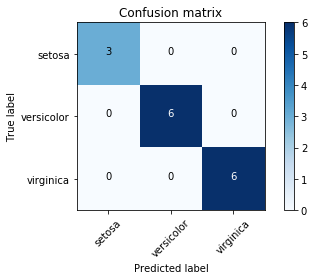

In [231]:
dtc_confusion = confusion_matrix(y_pred=iris_predict, y_true=iris_y_test)
plot_confusion_matrix(dtc_confusion, iris_data.target_names)

### kNN

In [232]:
knn_model = KNeighborsClassifier()
knn_model.fit(iris_X_train, iris_y_train)
iris_predict = knn_model.predict(iris_X_test)

###### kNN Metrics

In [233]:
accuracy = accuracy_score(y_pred=iris_predict, y_true=iris_y_test)
precision = precision_score(y_pred=iris_predict, y_true=iris_y_test, average='micro')
recall = recall_score(y_pred=iris_predict, y_true=iris_y_test, average='micro')

print("kNN accuracy : ", accuracy)
print("kNN precision : ", precision)
print("kNN recall : ", recall)

kNN accuracy :  1.0
kNN precision :  1.0
kNN recall :  1.0


##### kNN Confusion Matrix

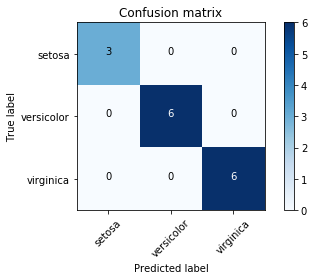

In [234]:
knn_confusion = confusion_matrix(y_pred=iris_predict, y_true=iris_y_test)
plot_confusion_matrix(knn_confusion, iris_data.target_names)

### MLP

In [235]:
mlp_model = MLPClassifier(max_iter=1000)
mlp_model.fit(iris_X_train, iris_y_train)
iris_predict = knn_model.predict(iris_X_test)
print(knn_model)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


#### MLP Metrics

In [236]:
accuracy = accuracy_score(y_pred=iris_predict, y_true=iris_y_test)
precision = precision_score(y_pred=iris_predict, y_true=iris_y_test, average='micro')
recall = recall_score(y_pred=iris_predict, y_true=iris_y_test, average='micro')

print("MLP accuracy : ", accuracy)
print("MLP precision : ", precision)
print("MLP recall : ", recall)

MLP accuracy :  1.0
MLP precision :  1.0
MLP recall :  1.0


#### MLP Confusion Matrix

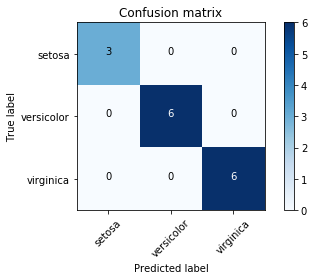

In [237]:
mlp_confusion = confusion_matrix(y_pred=iris_predict, y_true=iris_y_test)
plot_confusion_matrix(mlp_confusion, iris_data.target_names)

## D. Training with *K-Fold* split

### K-Fold split

In [238]:
def train_k_fold(k, model_type, X, y):
    # define metrics here, can be accuracy, error, etc.
    # the metrics will be accumulated and the average/variance will be calculated for k times
    kf = KFold(k)
    accuracies = []
    precisions = []
    recalls = []
    for train_idx, test_idx in kf.split(X):
        model = None
        if (model_type=="nb"):
            model = GaussianNB()
        elif(model_type=="dtc"):
            model = DecisionTreeClassifier()
        elif(model_type=="knn"):
            model = KNeighborsClassifier()
        elif(model_type=="mlp"):
            model = MLPClassifier(max_iter=1000)

        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        #Train model here and accumulate metrics 
        model.fit(X_train,y_train)
        iris_predict = model.predict(X_test)
        accuracy = accuracy_score(y_pred=iris_predict, y_true=y_test)
        precision = precision_score(y_pred=iris_predict, y_true=y_test, average='micro')
        recall = recall_score(y_pred=iris_predict, y_true=y_test, average='micro')

        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        
    avg_accuracy = sum(accuracies)/len(accuracies)
    avg_precision = sum(precisions)/len(precisions)
    avg_recall = sum(recalls)/len(recalls)
    
    return avg_accuracy, avg_precision, avg_recall

### Training Models

#### Naive Bayes

In [239]:
avg_accuracy,avg_precision, avg_recall = train_k_fold(10, "nb", iris_X, iris_y)

print("Naive Bayes average accuracy : ", avg_accuracy)
print("Naive Bayes average precision : ", avg_precision)
print("Naive Bayes average recall : ", avg_recall)

Naive Bayes average accuracy :  0.9466666666666669
Naive Bayes average precision :  0.9466666666666669
Naive Bayes average recall :  0.9466666666666669


#### Decision Tree

In [240]:
avg_accuracy,avg_precision, avg_recall = train_k_fold(10, "dtc", iris_X, iris_y)

print("Decision Tree average accuracy : ", avg_accuracy)
print("Decision Tree average precision : ", avg_precision)
print("Decision Tree average recall : ", avg_recall)

Decision Tree average accuracy :  0.9533333333333335
Decision Tree average precision :  0.9533333333333335
Decision Tree average recall :  0.9533333333333335


#### kNN

In [241]:
avg_accuracy,avg_precision, avg_recall = train_k_fold(10, "knn", iris_X, iris_y)

print("kNN average accuracy : ", avg_accuracy)
print("kNN average precision : ", avg_precision)
print("kNN average recall : ", avg_recall)

kNN average accuracy :  0.9333333333333333
kNN average precision :  0.9333333333333333
kNN average recall :  0.9333333333333333


#### MLP

In [242]:
avg_accuracy,avg_precision, avg_recall = train_k_fold(10, "mlp", iris_X, iris_y)

print("MLP average accuracy : ", avg_accuracy)
print("MLP average precision : ", avg_precision)
print("MLP average recall : ", avg_recall)

MLP average accuracy :  0.96
MLP average precision :  0.96
MLP average recall :  0.96


## E. Save model to external file

In [243]:
def save_model_to_file(model, filename):
    pickle.dump(model, open(filename, 'wb'))

#### Naive Bayes

In [244]:
save_model_to_file(nb_model, 'naive_bayes.sav')

#### kNN

In [245]:
save_model_to_file(knn_model, 'knn.sav')

#### Decision Tree Classifier

In [246]:
save_model_to_file(dtc_model, 'decision_tree.sav')

#### MLP

In [247]:
save_model_to_file(mlp_model, 'mlp.sav')

## F. Read model from external file

#### Naive Bayes

In [248]:
gnb_model = pickle.load(open("naive_bayes.sav", "rb"))
print(gnb_model)

GaussianNB(priors=None, var_smoothing=1e-09)


#### kNN

In [249]:
knn_model = pickle.load(open("knn.sav", "rb"))
print(knn_model)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


#### Decision Tree Classifier

In [250]:
dtc_model = pickle.load(open("decision_tree.sav", "rb"))
print(dtc_model)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


#### MLP

In [251]:
mlp_model = pickle.load(open("mlp.sav", "rb"))
print(mlp_model)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)


## G. Make new instance

In [252]:
new_instance1 = []
for _ in range(len(iris_data.feature_names)):
    new_instance1.append(random.random()*8)

print("New instance 1")
for i,name in enumerate(iris_data.feature_names):
    print(name, " = ", new_instance1[i])

New instance 1
sepal length (cm)  =  0.6761636975637773
sepal width (cm)  =  6.932676727114505
petal length (cm)  =  5.144429089237609
petal width (cm)  =  4.253440569888331


In [253]:
new_instance2 = []
for _ in range(len(iris_data.feature_names)):
    new_instance2.append(random.random()*8)

print("New instance 2")
for i,name in enumerate(iris_data.feature_names):
    print(name, " = ", new_instance2[i])

New instance 2
sepal length (cm)  =  5.886846297496622
sepal width (cm)  =  1.8602800950619027
petal length (cm)  =  6.484286767468618
petal width (cm)  =  6.877257517982906


## H. Classification with Models

### Naive Bayes

In [254]:
prediction = gnb_model.predict([new_instance1,new_instance2])
print ("Instance 1 Classification: ",prediction[0])
print ("Instance 2 Classification: ",prediction[1])

Instance 1 Classification:  2
Instance 2 Classification:  2


### Decision Tree

In [255]:
prediction = dtc_model.predict([new_instance1,new_instance2])
print ("Instance 1 Classification: ",prediction[0])
print ("Instance 2 Classification: ",prediction[1])

Instance 1 Classification:  2
Instance 2 Classification:  2


### kNN

In [256]:
prediction = knn_model.predict([new_instance1,new_instance2])
print ("Instance 1 Classification: ",prediction[0])
print ("Instance 2 Classification: ",prediction[1])

Instance 1 Classification:  2
Instance 2 Classification:  2


### MLP

In [257]:
prediction = mlp_model.predict([new_instance1,new_instance2])
print ("Instance 1 Classification: ",prediction[0])
print ("Instance 2 Classification: ",prediction[1])

Instance 1 Classification:  2
Instance 2 Classification:  2
